# **Data Loading**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [35]:
print(data.shape)

(200, 5)


In [36]:
print(data.columns)

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Cluster'],
      dtype='object')


In [37]:
print(data.isnull().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64


In [38]:
data = data.fillna(data.median())

In [41]:
print(data.duplicated().sum())

0


In [39]:
print(data.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       0   19                  15                      39        2
1       0   21                  15                      81        2
2       1   20                  16                       6        3
3       1   23                  16                      77        2
4       1   31                  17                      40        2


# **Exploratory Data Analysis**

In [40]:
print("Summary statistics:")
print(data.describe())

Summary statistics:
           Gender         Age  Annual Income (k$)  Spending Score (1-100)  \
count  200.000000  200.000000          200.000000              200.000000   
mean     0.560000   38.850000           60.560000               50.200000   
std      0.497633   13.969007           26.264721               25.823522   
min      0.000000   18.000000           15.000000                1.000000   
25%      0.000000   28.750000           41.500000               34.750000   
50%      1.000000   36.000000           61.500000               50.000000   
75%      1.000000   49.000000           78.000000               73.000000   
max      1.000000   70.000000          137.000000               99.000000   

          Cluster  
count  200.000000  
mean     1.755000  
std      1.468249  
min      0.000000  
25%      0.000000  
50%      2.000000  
75%      3.000000  
max      4.000000  


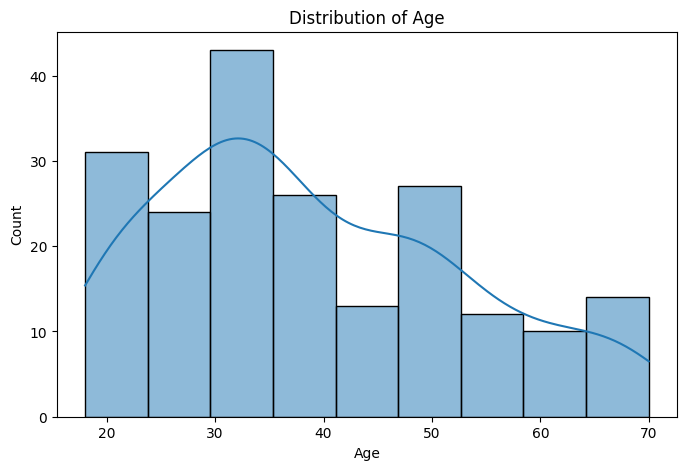

In [6]:
# Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

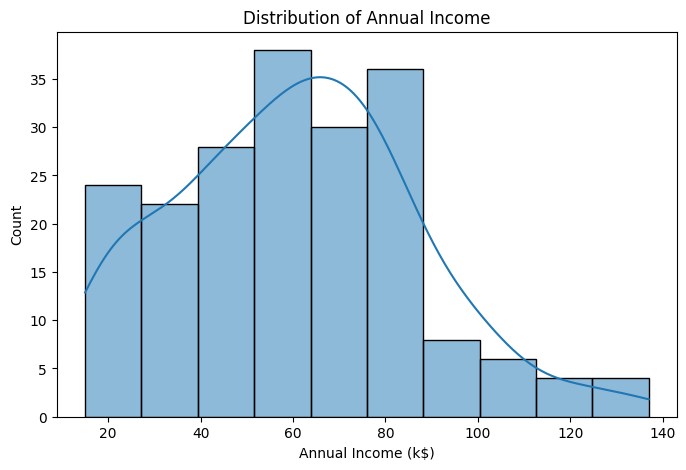

In [7]:
# Distribution of Annual Income
plt.figure(figsize=(8, 5))
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income')
plt.show()

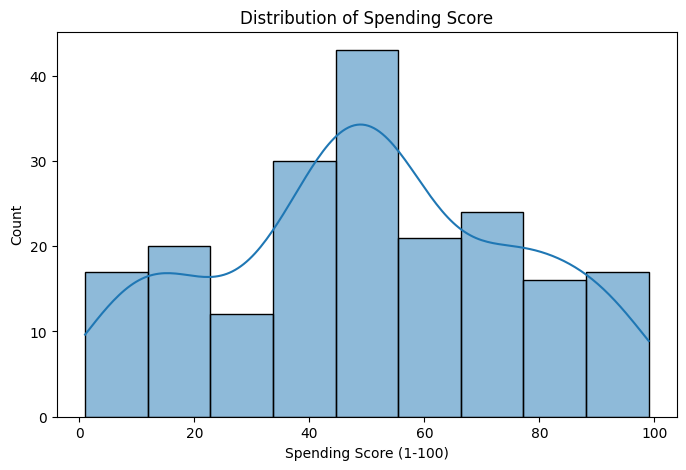

In [8]:
# Distribution of Spending Score
plt.figure(figsize=(8, 5))
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score')
plt.show()

# **Data Preprocessing**

In [11]:
data = data.drop(['CustomerID'], axis=1)

In [12]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [13]:
data_scaled = pd.DataFrame(data_scaled, columns=['Age', 'Annual Income', 'Spending Score'])
print(data_scaled.head())

        Age  Annual Income  Spending Score
0 -1.424569      -1.738999       -0.434801
1 -1.281035      -1.738999        1.195704
2 -1.352802      -1.700830       -1.715913
3 -1.137502      -1.700830        1.040418
4 -0.563369      -1.662660       -0.395980


In [25]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [26]:
data_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])

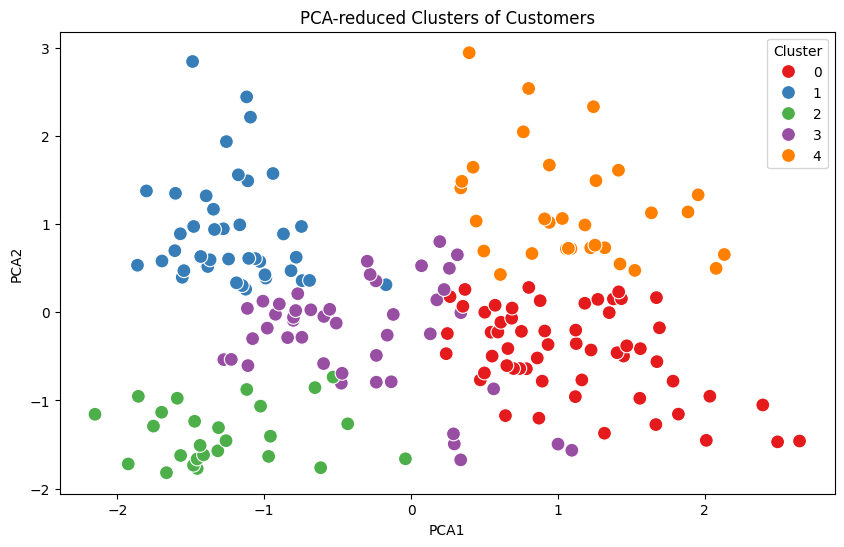

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca['PCA1'], y=data_pca['PCA2'], hue=data['Cluster'], palette='Set1', s=100)
plt.title('PCA-reduced Clusters of Customers')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [42]:
selected_features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[selected_features]

# **K-Means Clustering**

In [16]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)
data['Cluster'] = kmeans.labels_

In [17]:
print(data.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    Male   19                  15                      39        2
1    Male   21                  15                      81        2
2  Female   20                  16                       6        3
3  Female   23                  16                      77        2
4  Female   31                  17                      40        2


In [23]:
silhouette_avg = silhouette_score(data_scaled, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.41


# **Evaluate the Model**

In [18]:
inertia = []
K = range(1, 11)

In [19]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

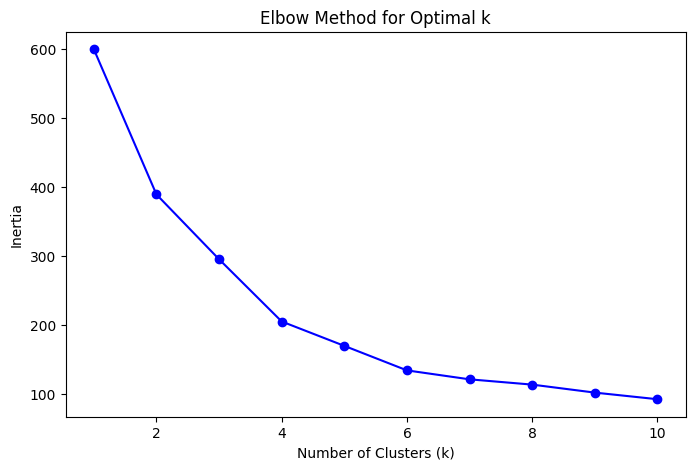

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# **Visualize the Clusters**

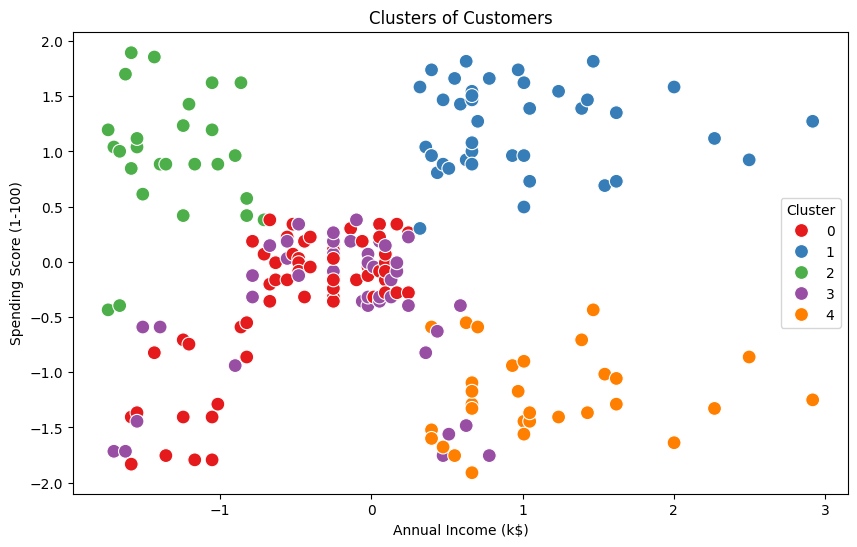

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled['Annual Income'], y=data_scaled['Spending Score'], hue=data['Cluster'], palette='Set1', s=100)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


# **Cluster Profiling**

In [32]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
cluster_profile = data.groupby('Cluster')[numeric_columns].mean()
print(cluster_profile)


               Age  Annual Income (k$)  Spending Score (1-100)  Cluster
Cluster                                                                
0        55.275862           47.620690               41.706897      0.0
1        32.875000           86.100000               81.525000      1.0
2        25.769231           26.115385               74.846154      2.0
3        26.733333           54.311111               40.911111      3.0
4        44.387097           89.774194               18.483871      4.0


In [33]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
cluster_profile = data.groupby('Cluster').mean()
print(cluster_profile)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.568966  55.275862           47.620690               41.706897
1        0.550000  32.875000           86.100000               81.525000
2        0.576923  25.769231           26.115385               74.846154
3        0.600000  26.733333           54.311111               40.911111
4        0.483871  44.387097           89.774194               18.483871


           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.568966  55.275862           47.620690               41.706897
1        0.550000  32.875000           86.100000               81.525000
2        0.576923  25.769231           26.115385               74.846154
3        0.600000  26.733333           54.311111               40.911111
4        0.483871  44.387097           89.774194               18.483871


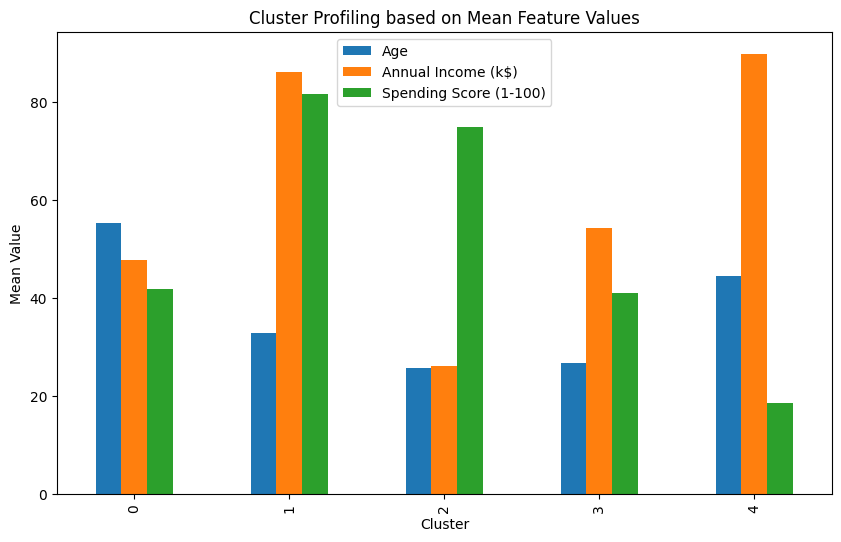

In [34]:
cluster_profile = data.groupby('Cluster').mean()
print(cluster_profile)
cluster_profile[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Profiling based on Mean Feature Values')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.show()
